<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbor

**KNN**
+ It is a not-parametric, lazy learning algorithm used for regression and classification problems.
+ In machine learning, lazy learning is a learning method in which generalization of the training data is delayed until a query is made to the system.
+ An eager learner system tries to generalize the training data before receiving queries.

**Parametrics vs non-parametrics**
+ Parametric model estimates a fixed number of parameters from the data and strong assumptions of the data.
+ The data is assumed to be following a specific probability distributions.
+ Logistic and linear regression are parametric models.
---
+ Non parametric models do not make any assumptions on the underlying data.

**KNN:**
+ It memorizes the data and classifies new observations by comparing the training data.
+ KNN algorithm finds observations in the training set, which are similar to the new observation.
+ These observations (in training set) are called neighbors.
+ A K set of neighbors can be considered for classifying a new observation.
+ The class for the new observation can be predicted to be same class that majority of the neighbors belong to.
+ 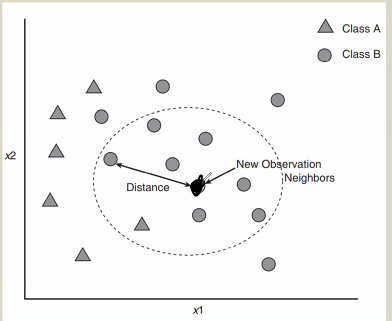

**KNN-Distances**
+ The neighbors are found by computing distance between observations.
+ Euclidean distance: It is the widely used distance metrics.
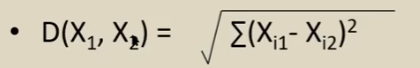

+ Manhattan
+ Minkowski
+ Chebyshev
+ Mahalanobis

**Limitations and challenges**
+ Decision of K
+ Missing values in data
+ Outliers
+ In case of ties - least class value
+ Curse of dimensionality with too many features

**Ideal K**
+ A lower k-low bias, high variance
+ A higher k- high bias low variance
+ An ideal k - low bias, low variance

**Curse of dimensionaltiy**
+ In a training data set, each column is a dimension on the coordinate system.
+ Dense points become sparse as dimensions increase (closer points become 'distant')
+ As dimensions increase (very high), all points become equidistant.
+ ML algorithms inherently works well with dense data points (from the point of view of generalising a model)
+ The solution is to increase the size of the training set.
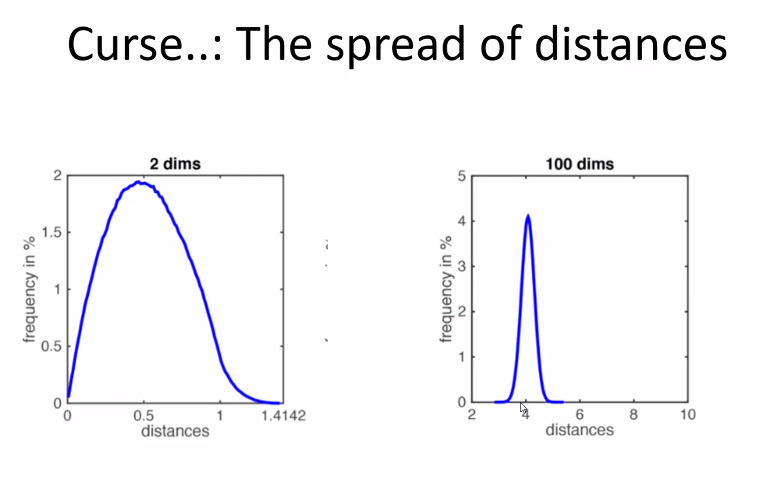

**Factors influencing choice of K**
+ Odd  value for K
+ In multi class classification, tie breaker still a challenge (with sklearn).
+ Weighing distances is an option
+ Rule of thumb, k=sqrt(N)/2
+ K may be a function of observations - size, pattern (not number of features or classes).

In [3]:
import pandas as pd

In [5]:
bank_df = pd.read_csv('bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [6]:
from sklearn.utils import resample

In [7]:
bank_subscribed_no = bank_df[bank_df['subscribed']=='no']
bank_subscribed_yes = bank_df[bank_df['subscribed']=='yes']

In [8]:
df_minority_upsampled = resample(bank_subscribed_yes, replace=True, n_samples=2000, random_state=42)

In [9]:
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [10]:
new_bank_df['subscribed'].value_counts()

no     4000
yes    2000
Name: subscribed, dtype: int64

In [11]:
X_features = list(new_bank_df.columns)
X_features.remove('subscribed')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [12]:
encoded_bank_df = pd.get_dummies(new_bank_df[X_features], drop_first=True)
X=encoded_bank_df

In [14]:
y = new_bank_df.subscribed.map(lambda x:int(x=='yes'))

In [16]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [18]:
model.fit(train_X, train_y)

KNeighborsClassifier()

In [23]:
pred_y = model.predict(test_X)

In [24]:
from sklearn import metrics

In [26]:
metrics.confusion_matrix(test_y, pred_y)

array([[961, 264],
       [200, 375]])

In [28]:
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1225
           1       0.59      0.65      0.62       575

    accuracy                           0.74      1800
   macro avg       0.71      0.72      0.71      1800
weighted avg       0.75      0.74      0.75      1800



**Grid Search CV**

In [29]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = [{'n_neighbors':range(3,10), 'metric':['euclidean', 'manhattan', 'chebyshev', 'canberra', 'minkowski']}]
modelCV = GridSearchCV(model, params, cv=10, scoring='roc_auc')
modelCV.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'chebyshev',
                                     'canberra', 'minkowski'],
                          'n_neighbors': range(3, 10)}],
             scoring='roc_auc')

In [38]:
modelCV.best_params_

{'metric': 'canberra', 'n_neighbors': 3}

In [39]:
modelCV.best_score_

0.8796935164136339

**Training the model with best params**

In [40]:
model = KNeighborsClassifier(n_neighbors=3, metric='canberra')
model.fit(train_X, train_y)

KNeighborsClassifier(metric='canberra', n_neighbors=3)

In [41]:
pred_y = model.predict(test_X)

In [42]:
metrics.confusion_matrix(test_y, pred_y)

array([[936, 289],
       [ 89, 486]])

In [43]:
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1225
           1       0.63      0.85      0.72       575

    accuracy                           0.79      1800
   macro avg       0.77      0.80      0.78      1800
weighted avg       0.82      0.79      0.80      1800



In [45]:
metrics.roc_auc_score(test_y, model.predict_proba(test_X)[:,1])

0.8772571428571428